In [13]:
import pandas as pd
import numpy as np

# Load the dataset
data=pd.read_csv('sample_data/mental-health-apprehensions-cleaned_FULL.csv', encoding='ISO-8859-1') #panda read csv

print("Initial data loaded:")
data.head()


Initial data loaded:


,EVENT_UNIQUE_ID,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DOW,Day_of_Year,REPORT_DAY,REPORT_HOUR,OCC_DATE,OCC_YEAR,...,DIVISION,PREMISES_TYPE,APPREHENSION_TYPE,SEX,AGE_COHORT,Neighbourhood_158,NEIGHBOURHOOD_158,Neighbourhood_140,NEIGHBOURHOOD_140,REPORT_DATE_COMBINED
0,GO-20141263946,2014-01-01,2014,January,Wednesday,1,1,19,2014-01-01,2014,...,D42,House,Mha Sec 17 (Power Of App),Male,55-64,144,Morningside Heights,131,Rouge (131),1-January-2014
1,GO-20141261121,2014-01-01,2014,January,Wednesday,1,1,5,2014-01-01,2014,...,D14,Apartment,Mha Sec 17 (Power Of App),Female,25-34,78,Kensington-Chinatown,78,Kensington-Chinatown (78),1-January-2014
2,GO-20141261310,2014-01-01,2014,January,Wednesday,1,1,8,2014-01-01,2014,...,Not Specified,Outside,Mha Sec 17 (Power Of App),Female,55-64,NSA,NSA,NSA,NSA,1-January-2014
3,GO-20141263993,2014-01-01,2014,January,Wednesday,1,1,19,2014-01-01,2014,...,D12,Apartment,Mha Sec 17 (Power Of App),Male,18 to 24,115,Mount Dennis,115,Mount Dennis (115),1-January-2014
4,GO-20141262098,2014-01-01,2014,January,Wednesday,1,1,11,2014-01-01,2014,...,D11,House,Mha Sec 17 (Power Of App),Male,25-34,91,Weston-Pelham Park,91,Weston-Pellam Park (91),1-January-2014


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108909 entries, 0 to 108908
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   EVENT_UNIQUE_ID       108909 non-null  object
 1   REPORT_DATE           108909 non-null  object
 2   REPORT_YEAR           108909 non-null  int64 
 3   REPORT_MONTH          108909 non-null  object
 4   REPORT_DOW            108909 non-null  object
 5   Day_of_Year           108909 non-null  int64 
 6   REPORT_DAY            108909 non-null  int64 
 7   REPORT_HOUR           108909 non-null  int64 
 8   OCC_DATE              108909 non-null  object
 9   OCC_YEAR              108909 non-null  int64 
 10  OCC_MONTH             108909 non-null  object
 11  OCC_DOY               108909 non-null  int64 
 12  OCC_DAY               108909 non-null  int64 
 13  OCC_DOW               108909 non-null  object
 14  OCC_HOUR              108909 non-null  int64 
 15  DIVISION         

In [14]:
#Drop unnecessary columns Report_Day_of_The_Year, Occurence_Day_of_The_Year, Hood_140 and Neighbourhood_140

# Specify the columns to drop; "140" is the Old Toronto Neighbourhood structure
columns_to_drop = ['Day_of_Year', 'OCC_DOY', 'Neighbourhood_140', 'NEIGHBOURHOOD_140']

# Drop the specified columns
data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Display the data after dropping columns
data.head()


,EVENT_UNIQUE_ID,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DOW,REPORT_DAY,REPORT_HOUR,OCC_DATE,OCC_YEAR,OCC_MONTH,...,OCC_DOW,OCC_HOUR,DIVISION,PREMISES_TYPE,APPREHENSION_TYPE,SEX,AGE_COHORT,Neighbourhood_158,NEIGHBOURHOOD_158,REPORT_DATE_COMBINED
0,GO-20141263946,2014-01-01,2014,January,Wednesday,1,19,2014-01-01,2014,January,...,Wednesday,19,D42,House,Mha Sec 17 (Power Of App),Male,55-64,144,Morningside Heights,1-January-2014
1,GO-20141261121,2014-01-01,2014,January,Wednesday,1,5,2014-01-01,2014,January,...,Wednesday,5,D14,Apartment,Mha Sec 17 (Power Of App),Female,25-34,78,Kensington-Chinatown,1-January-2014
2,GO-20141261310,2014-01-01,2014,January,Wednesday,1,8,2014-01-01,2014,January,...,Wednesday,6,Not Specified,Outside,Mha Sec 17 (Power Of App),Female,55-64,NSA,NSA,1-January-2014
3,GO-20141263993,2014-01-01,2014,January,Wednesday,1,19,2014-01-01,2014,January,...,Wednesday,19,D12,Apartment,Mha Sec 17 (Power Of App),Male,18 to 24,115,Mount Dennis,1-January-2014
4,GO-20141262098,2014-01-01,2014,January,Wednesday,1,11,2014-01-01,2014,January,...,Wednesday,11,D11,House,Mha Sec 17 (Power Of App),Male,25-34,91,Weston-Pelham Park,1-January-2014


In [15]:
#Rename some Columns for clarity:

data = data.rename(columns={
    'REPORT_DOW':'Report_Day_of_Week',
    'OCC_DATE':'Occurence_Date',
    'OCC_YEAR':'Occurence_Year',
    'OCC_MONTH':'Occurence_Month',
    'OCC_DAY':'Occurence_Day',
    'OCC_DOW':'Occurence_Day_of_Week',
    'OCC_HOUR':'Occurence_Hour'
})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108909 entries, 0 to 108908
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   EVENT_UNIQUE_ID        108909 non-null  object
 1   REPORT_DATE            108909 non-null  object
 2   REPORT_YEAR            108909 non-null  int64 
 3   REPORT_MONTH           108909 non-null  object
 4   Report_Day_of_Week     108909 non-null  object
 5   REPORT_DAY             108909 non-null  int64 
 6   REPORT_HOUR            108909 non-null  int64 
 7   Occurence_Date         108909 non-null  object
 8   Occurence_Year         108909 non-null  int64 
 9   Occurence_Month        108909 non-null  object
 10  Occurence_Day          108909 non-null  int64 
 11  Occurence_Day_of_Week  108909 non-null  object
 12  Occurence_Hour         108909 non-null  int64 
 13  DIVISION               108909 non-null  object
 14  PREMISES_TYPE          108909 non-null  object
 15  

In [ ]:
# Create the recoding dictionary directly in the script
recoding_dict = {
    'Mha Sec 15 (Form 1)' : 'Physician - Application for Psychiatric Assessment',
    'Mha Sec 16 (Form 2)' : 'Justice of the Peace - Order for Examination',
    'Mha Sec 17 (Power Of App)' : 'Police Officer\'s Power of Apprehension',
    'Mha Sec 28(1) (Form 9 Elopee)' : 'Elopee - Order for Return',
    'Mha Sec 33.4 (Form 47 Cto)' : 'Community Treatment Order for Examination'
}

# Add a new column 'Apprehension_Type_Recoded' to the original dataset
data['Apprehension_Type_Recoded'] = data['APPREHENSION_TYPE'].map(recoding_dict)

# Display the first few rows to verify the changes
print(data[['APPREHENSION_TYPE', 'Apprehension_Type_Recoded']].head(20))

# Save the updated DataFrame to a new CSV file
output_path = 'sample_data/V-mental-health-apprehensions-cleaned-updated.csv'
data.to_csv(output_path, index=False)


                APPREHENSION_TYPE  \
0       Mha Sec 17 (Power Of App)   
1       Mha Sec 17 (Power Of App)   
2       Mha Sec 17 (Power Of App)   
3       Mha Sec 17 (Power Of App)   
4       Mha Sec 17 (Power Of App)   
5       Mha Sec 17 (Power Of App)   
6       Mha Sec 17 (Power Of App)   
7       Mha Sec 17 (Power Of App)   
8       Mha Sec 17 (Power Of App)   
9             Mha Sec 16 (Form 2)   
10      Mha Sec 17 (Power Of App)   
11      Mha Sec 17 (Power Of App)   
12      Mha Sec 17 (Power Of App)   
13      Mha Sec 17 (Power Of App)   
14      Mha Sec 17 (Power Of App)   
15      Mha Sec 17 (Power Of App)   
16  Mha Sec 28(1) (Form 9 Elopee)   
17      Mha Sec 17 (Power Of App)   
18      Mha Sec 17 (Power Of App)   
19            Mha Sec 15 (Form 1)   

                            Apprehension_Type_Recoded  
0              Police Officer’s Power of Apprehension  
1              Police Officer’s Power of Apprehension  
2              Police Officer’s Power of Apprehension 

In [16]:
# Handle inconsistent data on more fields than previously done:
data['SEX'] = data['SEX'].str.capitalize()
data['DIVISION'] = data['DIVISION'].replace({'NSA': 'Not Specified'})
data['NEIGHBOURHOOD_158'] = data['NEIGHBOURHOOD_158'].replace({'NSA': 'Not Specified'})

print("\nAfter handling inconsistent data:")
print(data[['SEX', 'DIVISION', 'NEIGHBOURHOOD_158']].head())


After handling inconsistent data:
      SEX       DIVISION     NEIGHBOURHOOD_158
0    Male            D42   Morningside Heights
1  Female            D14  Kensington-Chinatown
2  Female  Not Specified         Not Specified
3    Male            D12          Mount Dennis
4    Male            D11    Weston-Pelham Park


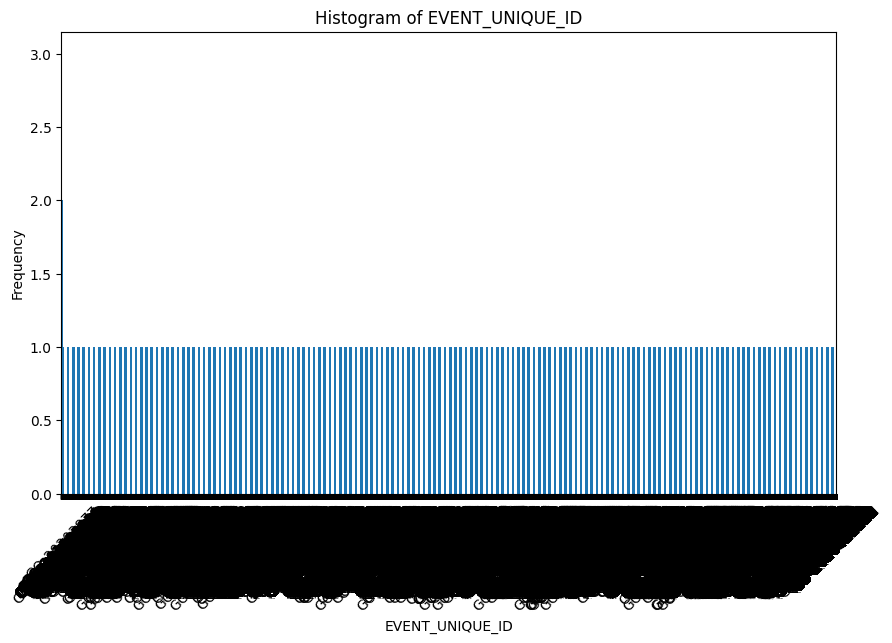

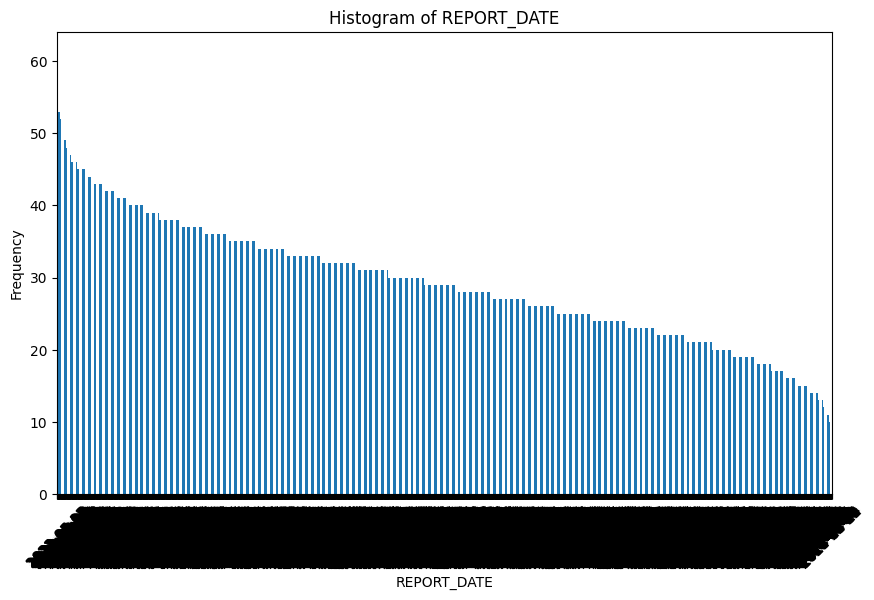

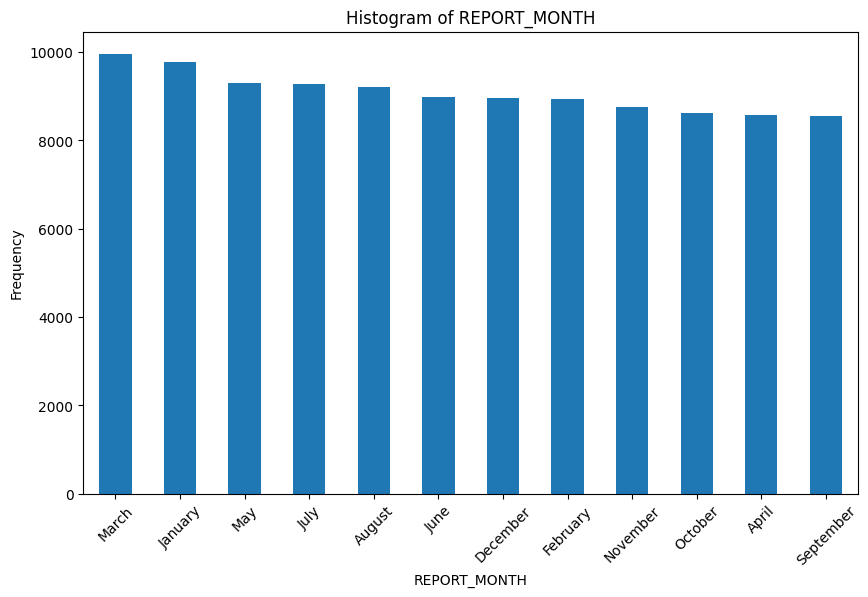

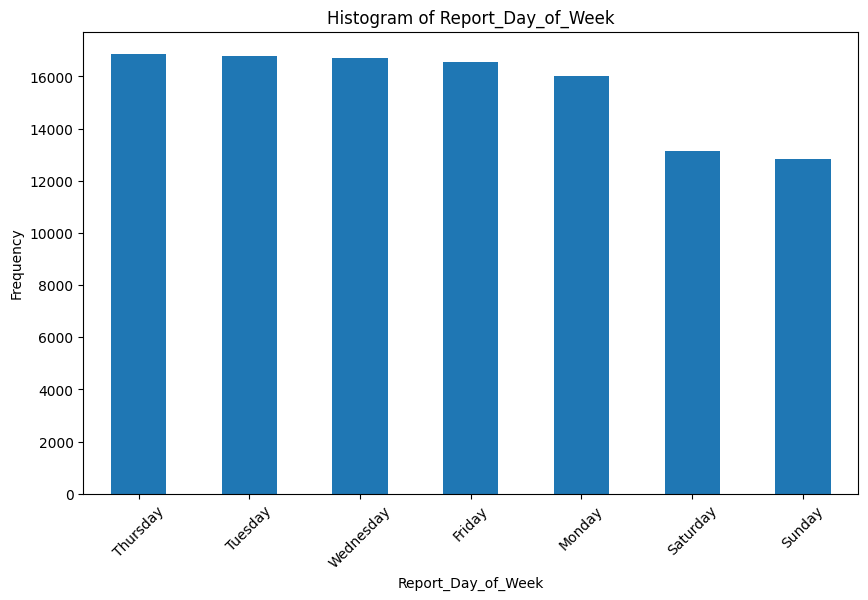

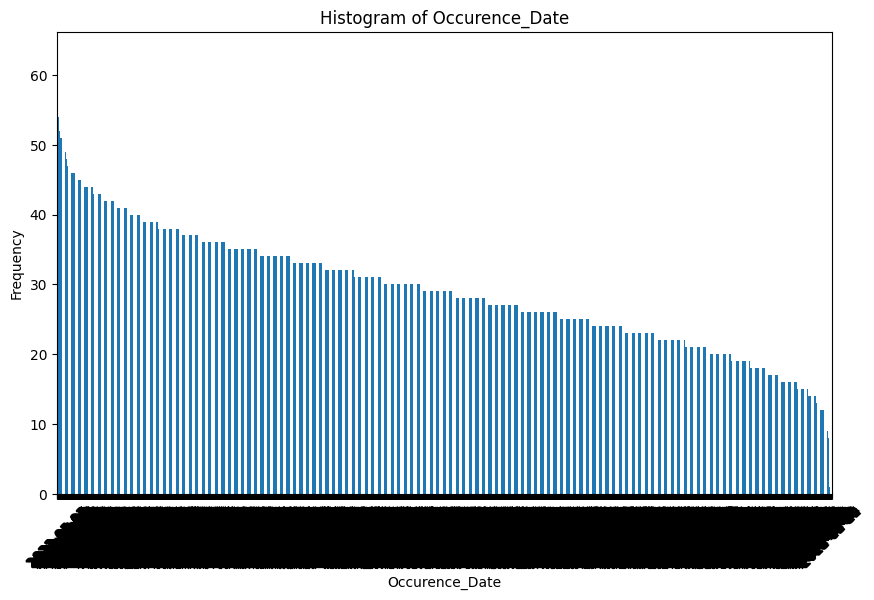

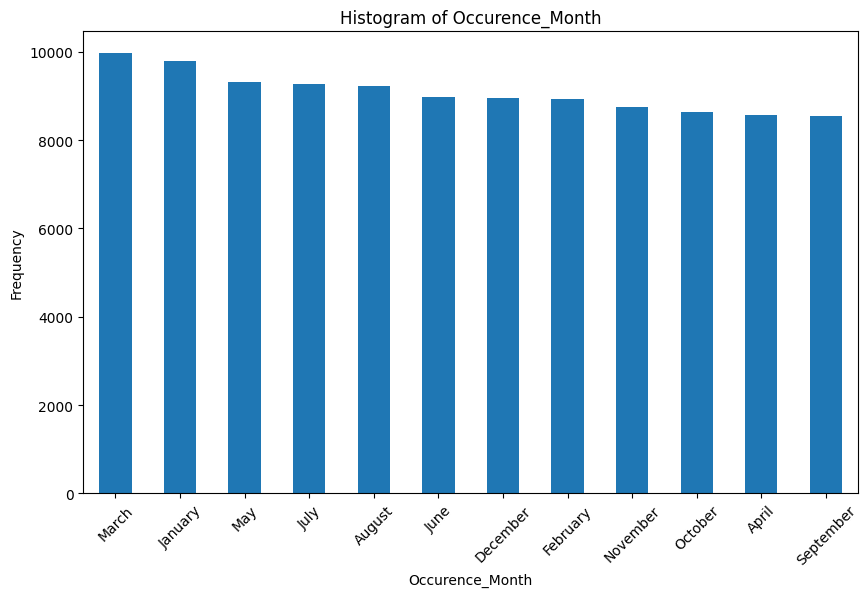

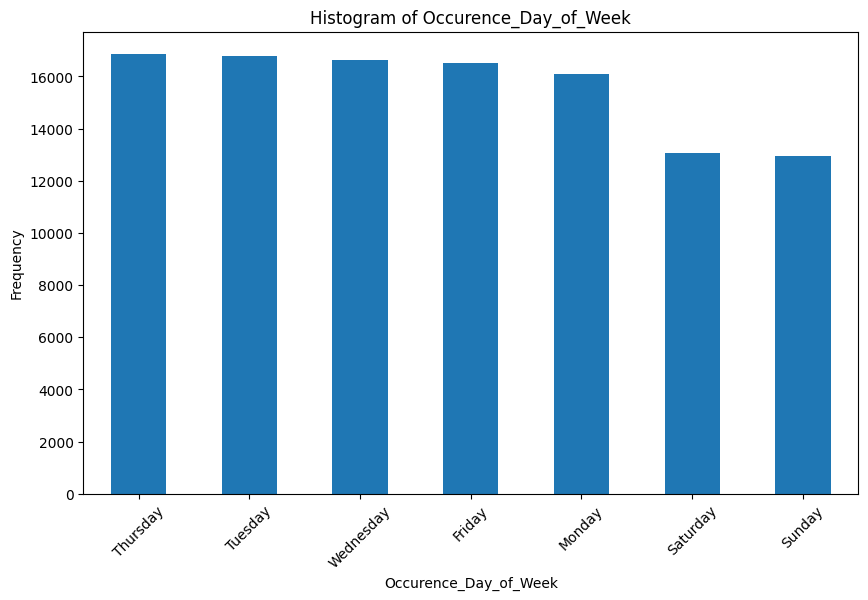

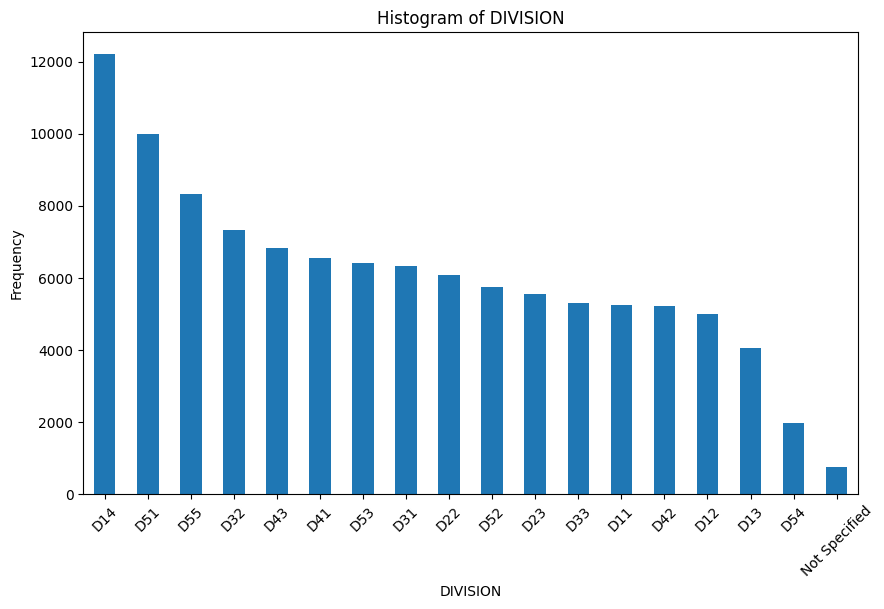

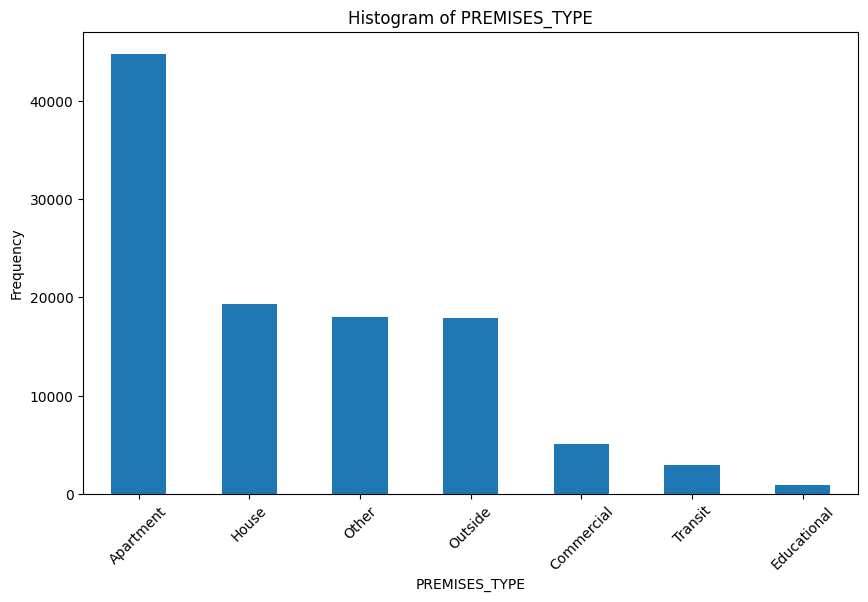

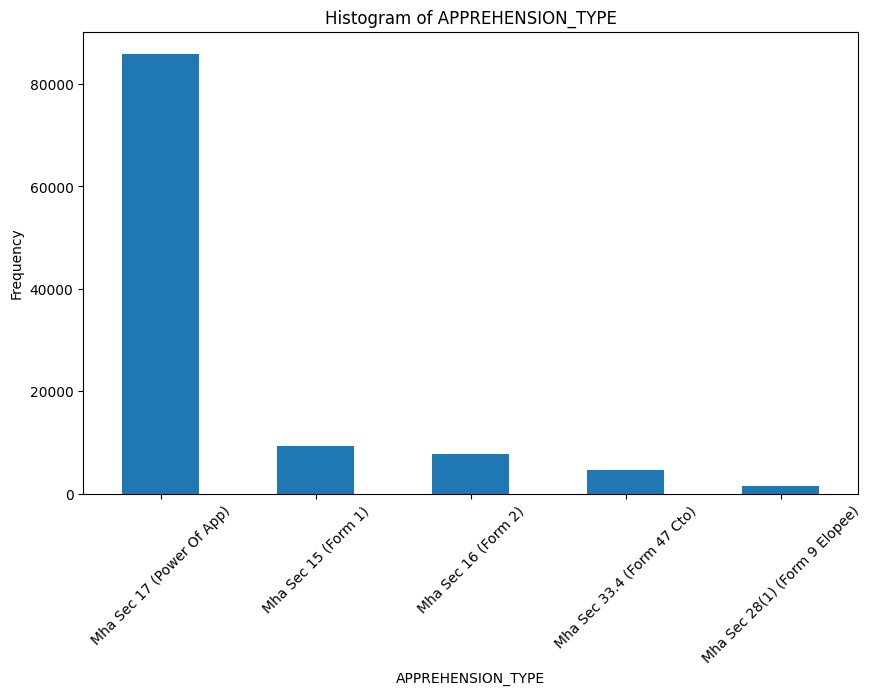

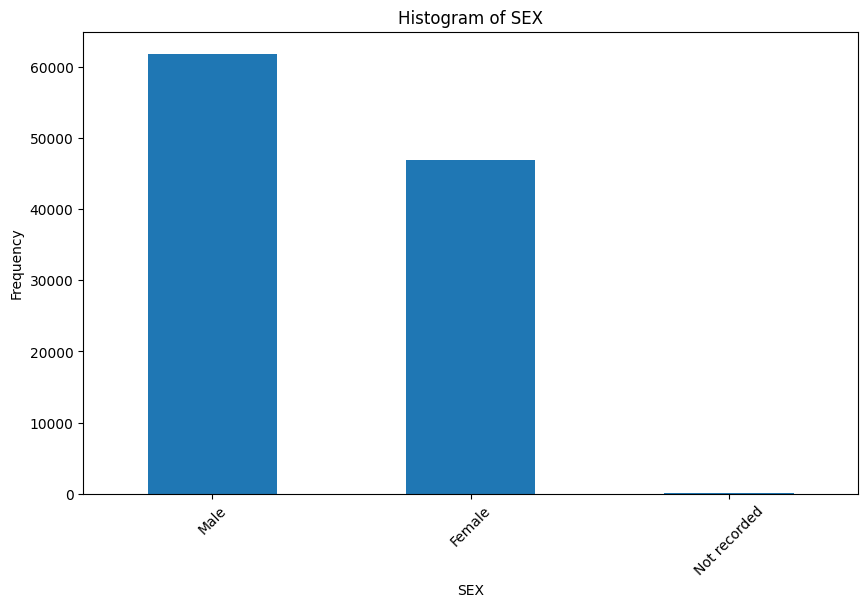

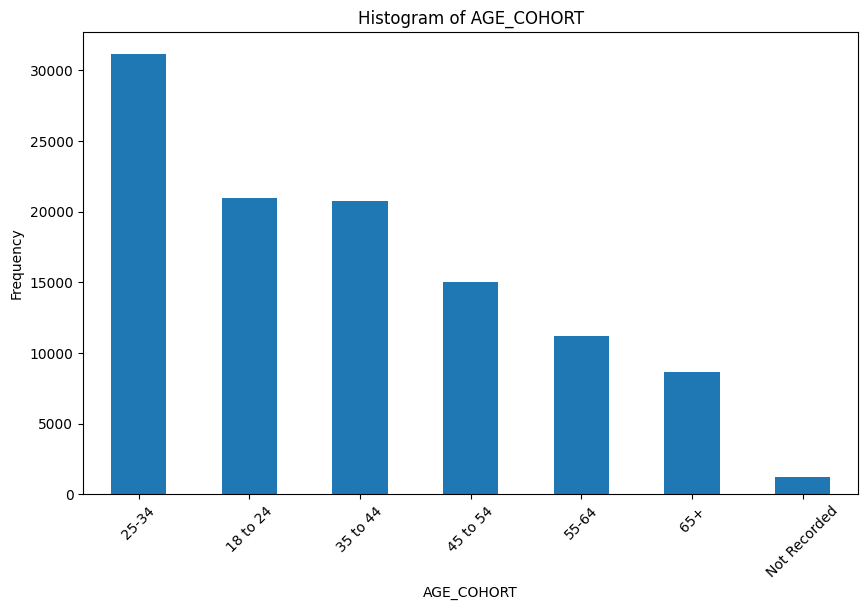

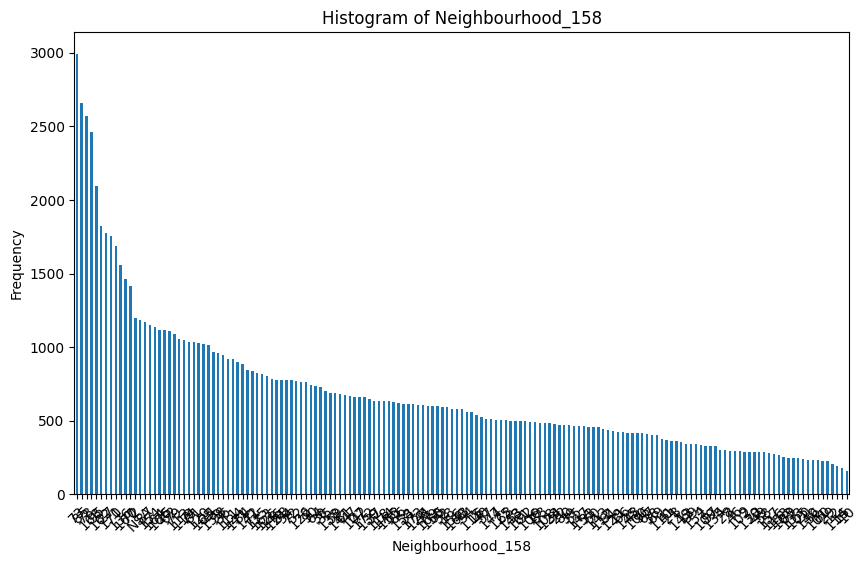

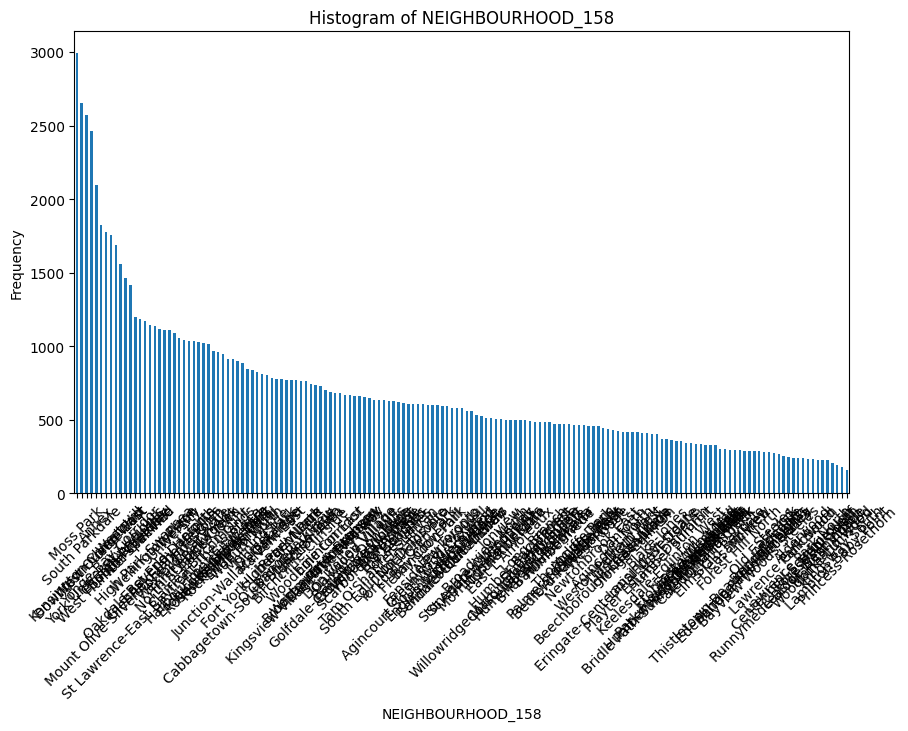

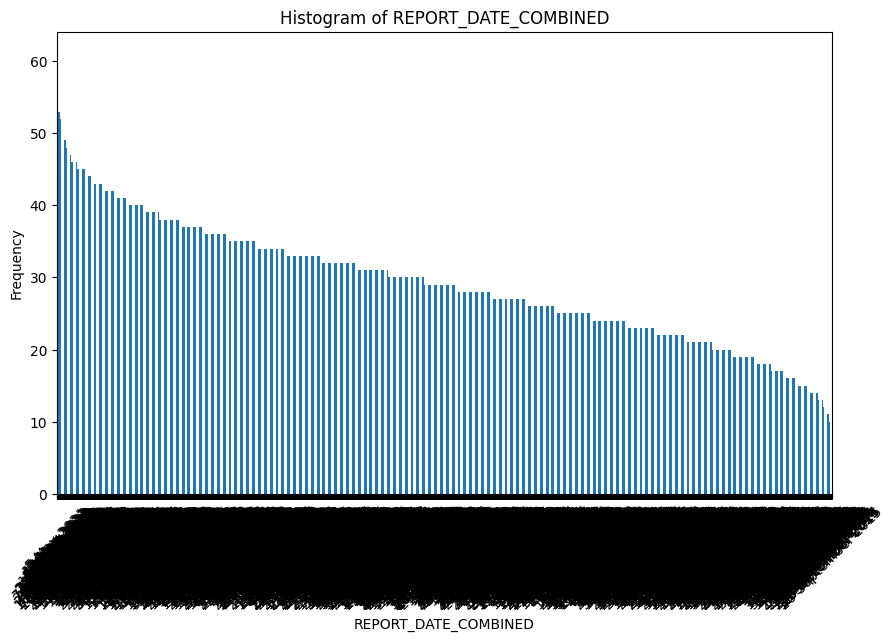

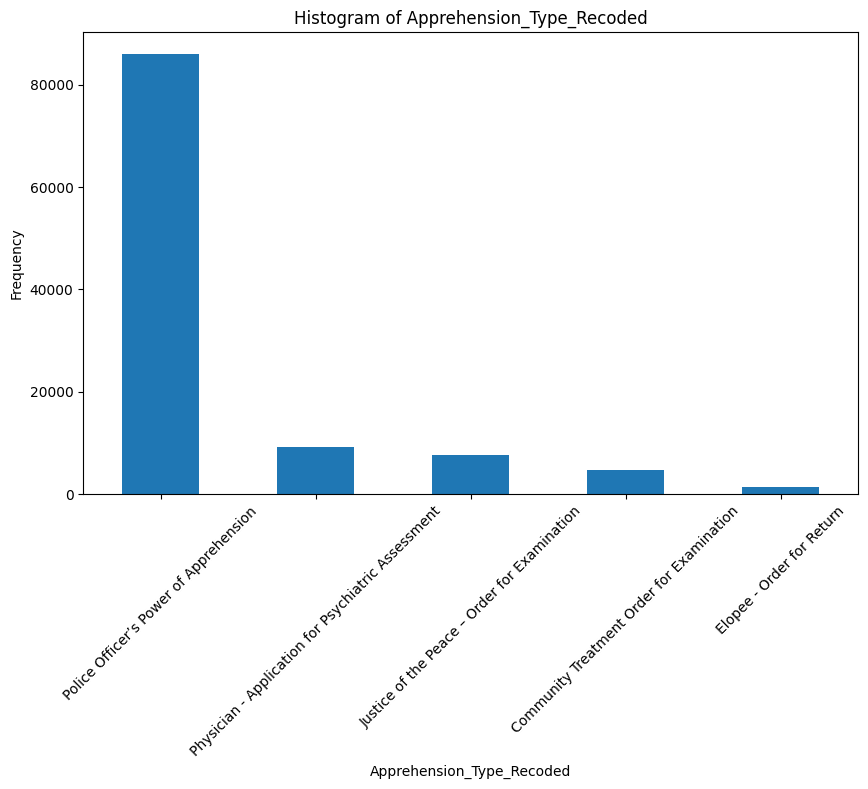

In [ ]:
#Display Frequency Distributions for the Categorical variables:

import matplotlib.pyplot as plt

categorical_columns = data.select_dtypes(include=['object', 'string']).columns

# plot histograms for the frequency distributions:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()




                APPREHENSION_TYPE  \
0       Mha Sec 17 (Power Of App)   
1       Mha Sec 17 (Power Of App)   
2       Mha Sec 17 (Power Of App)   
3       Mha Sec 17 (Power Of App)   
4       Mha Sec 17 (Power Of App)   
5       Mha Sec 17 (Power Of App)   
6       Mha Sec 17 (Power Of App)   
7       Mha Sec 17 (Power Of App)   
8       Mha Sec 17 (Power Of App)   
9             Mha Sec 16 (Form 2)   
10      Mha Sec 17 (Power Of App)   
11      Mha Sec 17 (Power Of App)   
12      Mha Sec 17 (Power Of App)   
13      Mha Sec 17 (Power Of App)   
14      Mha Sec 17 (Power Of App)   
15      Mha Sec 17 (Power Of App)   
16  Mha Sec 28(1) (Form 9 Elopee)   
17      Mha Sec 17 (Power Of App)   
18      Mha Sec 17 (Power Of App)   
19            Mha Sec 15 (Form 1)   

                            Apprehension_Type_Recoded  
0              Police Officer's Power of Apprehension  
1              Police Officer's Power of Apprehension  
2              Police Officer's Power of Apprehension 

In [ ]:
# Save the updated DataFrame to a new CSV file
output_path = 'sample_data/MHA-cleaned-EDA-June11-6.csv'
data.to_csv(output_path, index=False)